# 2022-12-06 Data Science Homework 5 Problem 3

###### HsuanYu CHOU

1.  objectives & constraints
2.  寫出兩個 support vectors
3.  列出計算過程
4.  寫出 w, b, and hyperplane ( y = w^T x + b )

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [12]:
data = np.array([
    [4, 3, 1],
    [4, 8, 1],
    [7, 2, 1],
    [-1, -2, -1],
    [-1, 3, -1],
    [2, -1, -1],
    [2, 1, -1],
])

print(data)

[[ 4  3  1]
 [ 4  8  1]
 [ 7  2  1]
 [-1 -2 -1]
 [-1  3 -1]
 [ 2 -1 -1]
 [ 2  1 -1]]


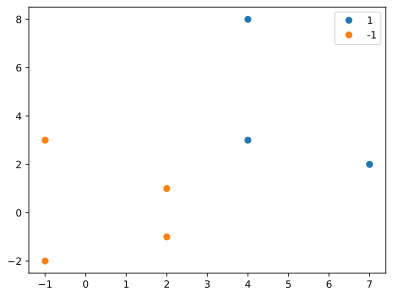

In [15]:
fig, ax = plt.subplots()

ax.plot(data[:3, 0], data[:3, 1], 'o', label=1)
ax.plot(data[3:, 0], data[3:, 1], 'o', label=-1)
ax.legend()

plt.show()

### Objective:
Find $\underset{\textbf{w}}{\arg\max}\,\frac{2}{\|\textbf{w}\|^2}$ .
### Constraint: 
$
f(\textbf{x}) =
\begin{cases}
  1 &  \text{if } \textbf{w} \cdot \textbf{x} + b \ge 1  \\
  -1 & \text{if } \textbf{w} \cdot \textbf{x} + b \le -1 \\
\end{cases}
$

In [18]:
X = data[:, :-1]
y = data[:, -1]

clf = svm.SVC(kernel="linear")
clf.fit(X, y)

SVC(kernel='linear')

In [30]:
support_vectors = clf.support_vectors_

print(support_vectors)

In [32]:
w = clf.coef_
b = clf.intercept_

print(w)
print(b)

[[0.5 0.5]]
[-2.5]


### Hyperplane:
$
y =
\begin{pmatrix}
    0.5 \\
    0.5 \\
\end{pmatrix}
\cdot \textbf{x} - 2.5
$

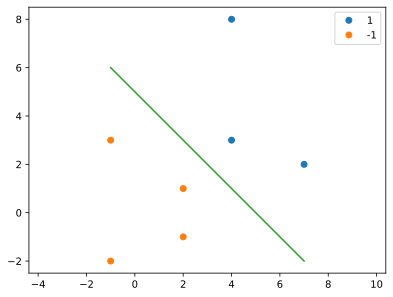

In [46]:
h_x1 = np.linspace(min(data[:, 0]), max(data[:, 0]), 100)
h_x2 = 5 - h_x1

fig, ax = plt.subplots()

ax.plot(data[:3, 0], data[:3, 1], 'o', label=1)
ax.plot(data[3:, 0], data[3:, 1], 'o', label=-1)
ax.plot(h_x1, h_x2)
ax.legend()
ax.axis('equal')

plt.show()

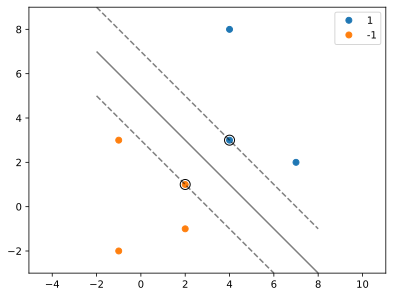

In [42]:
from sklearn.inspection import DecisionBoundaryDisplay


fig, ax = plt.subplots()

ax.plot(data[:3, 0], data[:3, 1], 'o', label=1)
ax.plot(data[3:, 0], data[3:, 1], 'o', label=-1)
ax.legend()
ax.axis('equal')

DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.show()